In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

In [ ]:
ls

In [3]:
montero_track_data = pd.read_csv('Montero_Track_Data.csv')
equal_track_data = pd.read_csv('Equal_Track_Data.csv')
montero_audio_features = pd.read_csv('Montero_Audio_Features.csv')
equal_audio_features = pd.read_csv('Equal_Audio_Features.csv')

In [4]:
montero_track_data.head()

,Unnamed: 0,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",1,137704,True,{'isrc': 'USSM12100531'},{'spotify': 'https://open.spotify.com/track/1S...,https://api.spotify.com/v1/tracks/1SC5rEoYDGUK...,1SC5rEoYDGUK4NfG82494W,False,MONTERO (Call Me By Your Name),91,https://p.scdn.co/mp3-preview/a6e05149543aaa36...,1,track,spotify:track:1SC5rEoYDGUK4NfG82494W
1,1,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",1,221203,True,{'isrc': 'USSM12105731'},{'spotify': 'https://open.spotify.com/track/3g...,https://api.spotify.com/v1/tracks/3grVoZ10bm2j...,3grVoZ10bm2jUGpo7BxpuF,False,DEAD RIGHT NOW,79,https://p.scdn.co/mp3-preview/5183150db97cee38...,2,track,spotify:track:3grVoZ10bm2jUGpo7BxpuF
2,2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",1,212352,True,{'isrc': 'USSM12104539'},{'spotify': 'https://open.spotify.com/track/5Z...,https://api.spotify.com/v1/tracks/5Z9KJZvQzH6P...,5Z9KJZvQzH6PFmb8SNkxuk,False,INDUSTRY BABY (feat. Jack Harlow),91,https://p.scdn.co/mp3-preview/c1cb40d748692992...,3,track,spotify:track:5Z9KJZvQzH6PFmb8SNkxuk
3,3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",1,143901,True,{'isrc': 'USSM12105732'},{'spotify': 'https://open.spotify.com/track/0e...,https://api.spotify.com/v1/tracks/0e8nrvls4Qqv...,0e8nrvls4Qqv5Rfa2UhqmO,False,THATS WHAT I WANT,95,https://p.scdn.co/mp3-preview/75aa4d781c96fe99...,4,track,spotify:track:0e8nrvls4Qqv5Rfa2UhqmO
4,4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"['AD', 'AE', 'AG', 'AL', 'AM', 'AO', 'AR', 'AT...",1,24005,False,{'isrc': 'USSM12105733'},{'spotify': 'https://open.spotify.com/track/1B...,https://api.spotify.com/v1/tracks/1BMu5TWvalAG...,1BMu5TWvalAGpi5jlhFEBb,False,THE ART OF REALIZATION,28,https://p.scdn.co/mp3-preview/e86b2ac42600eea6...,5,track,spotify:track:1BMu5TWvalAGpi5jlhFEBb


In [5]:
montero_audio_features.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,0.593,0.503,8,-6.725,0,0.2200,0.29300,0.000000,0.4050,0.710,178.781,audio_features,1SC5rEoYDGUK4NfG82494W,spotify:track:1SC5rEoYDGUK4NfG82494W,https://api.spotify.com/v1/tracks/1SC5rEoYDGUK...,https://api.spotify.com/v1/audio-analysis/1SC5...,137704,4
1,1,0.685,0.717,0,-6.456,0,0.0411,0.10100,0.000019,0.2660,0.549,127.963,audio_features,3grVoZ10bm2jUGpo7BxpuF,spotify:track:3grVoZ10bm2jUGpo7BxpuF,https://api.spotify.com/v1/tracks/3grVoZ10bm2j...,https://api.spotify.com/v1/audio-analysis/3grV...,221203,4
2,2,0.741,0.691,10,-7.395,0,0.0672,0.02210,0.000000,0.0476,0.892,150.087,audio_features,5Z9KJZvQzH6PFmb8SNkxuk,spotify:track:5Z9KJZvQzH6PFmb8SNkxuk,https://api.spotify.com/v1/tracks/5Z9KJZvQzH6P...,https://api.spotify.com/v1/audio-analysis/5Z9K...,212353,4
3,3,0.737,0.846,1,-4.510,0,0.2200,0.00614,0.000000,0.0486,0.546,87.981,audio_features,0e8nrvls4Qqv5Rfa2UhqmO,spotify:track:0e8nrvls4Qqv5Rfa2UhqmO,https://api.spotify.com/v1/tracks/0e8nrvls4Qqv...,https://api.spotify.com/v1/audio-analysis/0e8n...,143901,4
4,4,0.519,0.464,10,-18.957,0,0.5600,0.90500,0.000000,0.4480,0.287,109.744,audio_features,1BMu5TWvalAGpi5jlhFEBb,spotify:track:1BMu5TWvalAGpi5jlhFEBb,https://api.spotify.com/v1/tracks/1BMu5TWvalAG...,https://api.spotify.com/v1/audio-analysis/1BMu...,24006,4


In [6]:
equal_audio_features.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,0.631,0.825,11,-3.971,1,0.0433,0.01670,0.000000,0.1220,0.427,129.942,audio_features,2JiHR4gCDjXwYVRDmwdk95,spotify:track:2JiHR4gCDjXwYVRDmwdk95,https://api.spotify.com/v1/tracks/2JiHR4gCDjXw...,https://api.spotify.com/v1/audio-analysis/2JiH...,195760,3
1,1,0.788,0.859,2,-2.724,1,0.0856,0.28100,0.000000,0.0424,0.822,141.020,audio_features,50nfwKoDiSYg8zOCREWAm5,spotify:track:50nfwKoDiSYg8zOCREWAm5,https://api.spotify.com/v1/tracks/50nfwKoDiSYg...,https://api.spotify.com/v1/audio-analysis/50nf...,207853,4
2,2,0.587,0.267,8,-9.206,1,0.0349,0.84000,0.000000,0.1210,0.352,98.845,audio_features,5QYnNhTKsN3kE7OaqILA1U,spotify:track:5QYnNhTKsN3kE7OaqILA1U,https://api.spotify.com/v1/tracks/5QYnNhTKsN3k...,https://api.spotify.com/v1/audio-analysis/5QYn...,185853,4
3,3,0.807,0.893,11,-3.745,0,0.0347,0.04510,0.000028,0.3660,0.537,126.011,audio_features,3rmo8F54jFF8OgYsqTxm5d,spotify:track:3rmo8F54jFF8OgYsqTxm5d,https://api.spotify.com/v1/tracks/3rmo8F54jFF8...,https://api.spotify.com/v1/audio-analysis/3rmo...,230747,4
4,4,0.520,0.849,9,-3.794,0,0.1860,0.00253,0.000000,0.1190,0.774,175.908,audio_features,4btFHqumCO31GksfuBLLv3,spotify:track:4btFHqumCO31GksfuBLLv3,https://api.spotify.com/v1/tracks/4btFHqumCO31...,https://api.spotify.com/v1/audio-analysis/4btF...,236907,4


In [7]:
equal_names = equal_track_data[['name', 'uri']]

In [8]:
equal_names

,name,uri
0,Tides,spotify:track:2JiHR4gCDjXwYVRDmwdk95
1,Shivers,spotify:track:50nfwKoDiSYg8zOCREWAm5
2,First Times,spotify:track:5QYnNhTKsN3kE7OaqILA1U
3,Bad Habits,spotify:track:3rmo8F54jFF8OgYsqTxm5d
4,Overpass Graffiti,spotify:track:4btFHqumCO31GksfuBLLv3
5,The Joker And The Queen,spotify:track:3NuLxTXowTRcguTh9RsPmM
6,Leave Your Life,spotify:track:0YbI9lWxUBsCJLb6EBydkr
7,Collide,spotify:track:5sv0WnUs74Orn6GoPmC5im
8,2step,spotify:track:2SUxn2O9NHL6GHGQFgwCY0
9,Stop The Rain,spotify:track:0VuDtcT7H4CAljLZEH021x


In [9]:
equal_audio_features_names = pd.merge(equal_audio_features, equal_names, left_on = "uri", right_on = 'uri', how = 'left').drop("uri", axis = 1)

In [10]:
equal_audio_features_names.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature,name
0,0,0.631,0.825,11,-3.971,1,0.0433,0.01670,0.000000,0.1220,0.427,129.942,audio_features,2JiHR4gCDjXwYVRDmwdk95,https://api.spotify.com/v1/tracks/2JiHR4gCDjXw...,https://api.spotify.com/v1/audio-analysis/2JiH...,195760,3,Tides
1,1,0.788,0.859,2,-2.724,1,0.0856,0.28100,0.000000,0.0424,0.822,141.020,audio_features,50nfwKoDiSYg8zOCREWAm5,https://api.spotify.com/v1/tracks/50nfwKoDiSYg...,https://api.spotify.com/v1/audio-analysis/50nf...,207853,4,Shivers
2,2,0.587,0.267,8,-9.206,1,0.0349,0.84000,0.000000,0.1210,0.352,98.845,audio_features,5QYnNhTKsN3kE7OaqILA1U,https://api.spotify.com/v1/tracks/5QYnNhTKsN3k...,https://api.spotify.com/v1/audio-analysis/5QYn...,185853,4,First Times
3,3,0.807,0.893,11,-3.745,0,0.0347,0.04510,0.000028,0.3660,0.537,126.011,audio_features,3rmo8F54jFF8OgYsqTxm5d,https://api.spotify.com/v1/tracks/3rmo8F54jFF8...,https://api.spotify.com/v1/audio-analysis/3rmo...,230747,4,Bad Habits
4,4,0.520,0.849,9,-3.794,0,0.1860,0.00253,0.000000,0.1190,0.774,175.908,audio_features,4btFHqumCO31GksfuBLLv3,https://api.spotify.com/v1/tracks/4btFHqumCO31...,https://api.spotify.com/v1/audio-analysis/4btF...,236907,4,Overpass Graffiti


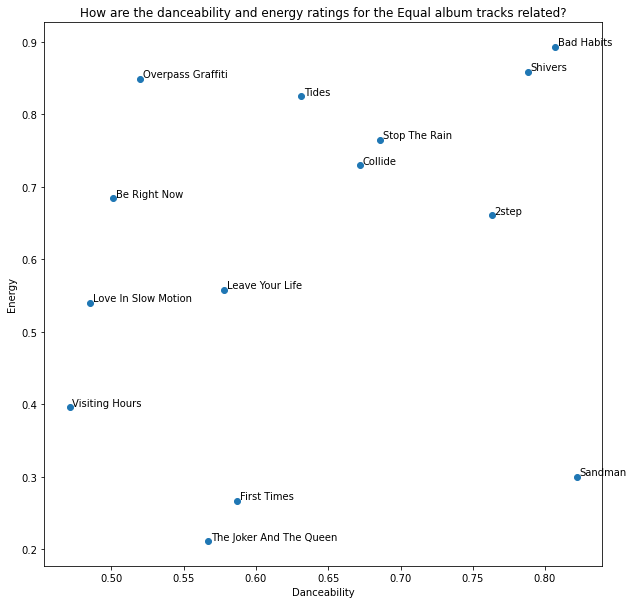

In [11]:
fig4, ax4 = plt.subplots(1, 1, figsize = (10, 10))
ax4.scatter(equal_audio_features_names['danceability'], equal_audio_features_names['energy'])
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.title("How are the danceability and energy ratings for the Equal album tracks related?")
for i, label in enumerate(equal_audio_features_names['name']):
    plt.annotate(label, (equal_audio_features_names['danceability'][i]+.002, equal_audio_features_names['energy'][i]+.002))
plt.show()

In [12]:
stats.pearsonr(equal_audio_features_names['danceability'], equal_audio_features_names['energy'])

(0.2685987813008287, 0.35313358008439677)

In [13]:
equal_rm_one = equal_audio_features_names[equal_audio_features_names['name'] != 'Sandman']

In [14]:
stats.pearsonr(equal_rm_one['danceability'], equal_rm_one['energy'])

(0.5219312245607794, 0.0673206467708329)

In [15]:
equal_rm_three = equal_audio_features_names[(equal_audio_features_names['name'] != 'Sandman') & (equal_audio_features_names['name'] != 'First Times') & (equal_audio_features_names['name'] != 'The Joker And The Queen')]

In [16]:
stats.pearsonr(equal_rm_three['danceability'], equal_rm_three['energy'])

(0.6323140340065213, 0.0368426457195758)

In [17]:
reg_all = stats.linregress(equal_audio_features_names['danceability'], equal_audio_features_names['energy'])
reg_all

LinregressResult(slope=0.5102043013067536, intercept=0.28631472949990283, rvalue=0.2685987813008287, pvalue=0.35313358008439644, stderr=0.5281891059577386, intercept_stderr=0.3408178248049743)

In [18]:
reg_rm_one = stats.linregress(equal_rm_one['danceability'], equal_rm_one['energy'])
reg_rm_one

LinregressResult(slope=1.0197739168640638, intercept=0.0017462558263923178, rvalue=0.5219312245607796, pvalue=0.06732064677083284, stderr=0.5025010585642001, intercept_stderr=0.31637963692531557)

In [19]:
reg_rm_three = stats.linregress(equal_rm_three['danceability'], equal_rm_three['energy'])
reg_rm_three

LinregressResult(slope=0.7911699638251296, intercept=0.20903135542535956, rvalue=0.6323140340065214, pvalue=0.03684264571957576, stderr=0.3231142411030302, intercept_stderr=0.20637167251084276)

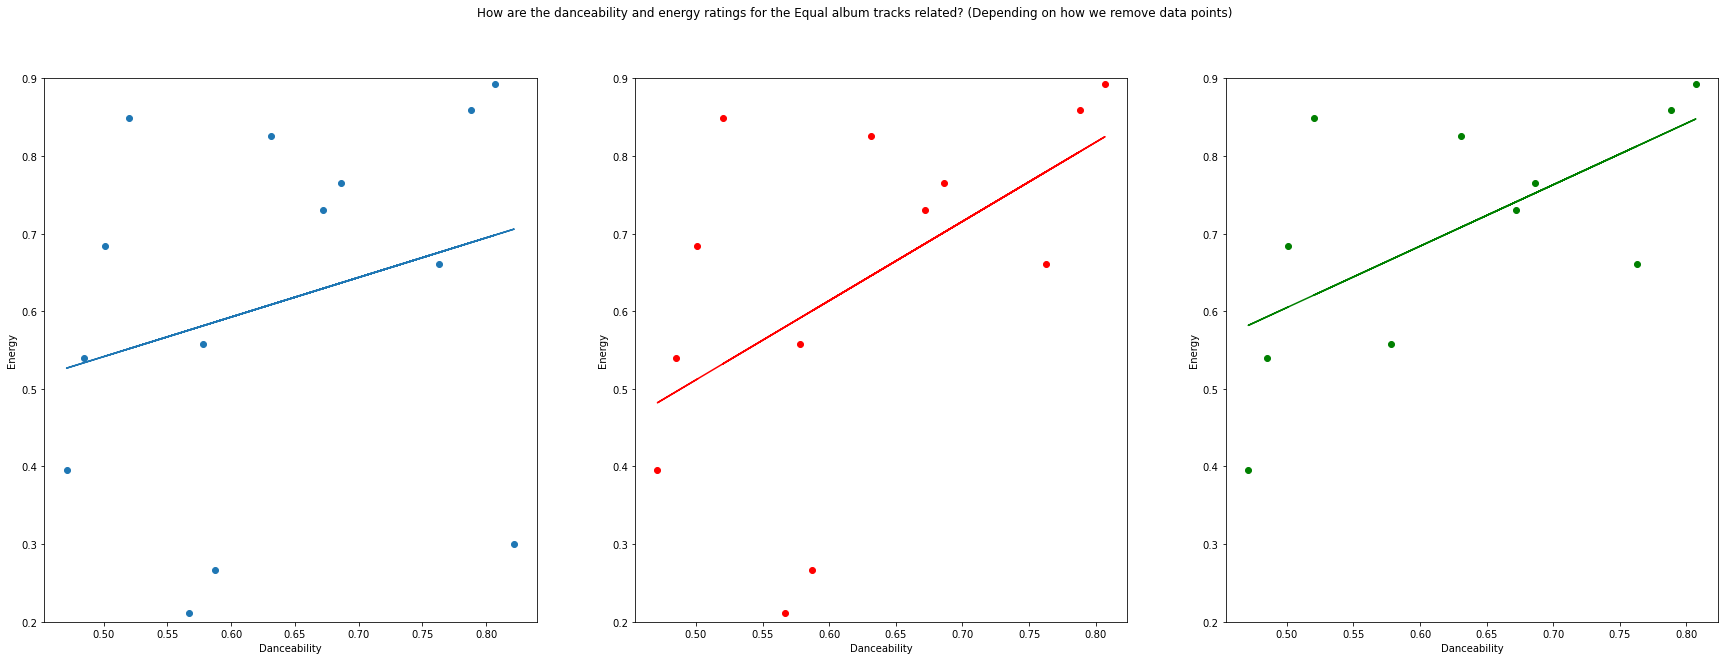

In [20]:
fig6, ax6 = plt.subplots(1, 3, figsize = (30, 10))
ax6[0].scatter(equal_audio_features_names['danceability'], equal_audio_features_names['energy'])
ax6[0].plot(equal_audio_features_names['danceability'], reg_all.intercept + reg_all.slope * equal_audio_features_names['danceability'])
ax6[0].set_ylabel('Energy')
ax6[0].set_xlabel('Danceability')
# Run with and without set_ylim
ax6[0].set_ylim(.2, .9)

ax6[1].scatter(equal_rm_one['danceability'], equal_rm_one['energy'], color = 'red')
ax6[1].plot(equal_rm_one['danceability'], reg_rm_one.intercept + reg_rm_one.slope * equal_rm_one['danceability'], color = 'red')
ax6[1].set_ylabel('Energy')
ax6[1].set_xlabel('Danceability')
# Run with and without set_ylim
ax6[1].set_ylim(.2, .9)

ax6[2].scatter(equal_rm_three['danceability'], equal_rm_three['energy'], color = 'green')
ax6[2].plot(equal_rm_three['danceability'], reg_rm_three.intercept + reg_rm_three.slope * equal_rm_three['danceability'], color = 'green')
ax6[2].set_ylabel('Energy')
ax6[2].set_xlabel('Danceability')
# Run with and without set_ylim
ax6[2].set_ylim(.2, .9)

fig6.suptitle("How are the danceability and energy ratings for the Equal album tracks related? (Depending on how we remove data points)")
plt.show()